In [1]:
import pandas as pd

def load_data():
    df = pd.read_csv("../data/titanic_cleaned.csv")
    return df

df = load_data()

In [2]:
from dotenv import load_dotenv
from langchain_groq import ChatGroq
from langchain_experimental.agents import create_pandas_dataframe_agent

In [3]:
load_dotenv()

model = ChatGroq(
        model="llama-3.3-70b-versatile",
        temperature=0
    )
# model = ChatGroq(
#         model="llama-3.1-8b-instant",
#         temperature=0
#     )

In [30]:
prompt = """
You are a experienced data analyst working with the Titanic dataset.

Dataset Context:
- The dataset contains passenger information such as age, sex, fare, pclass, survived, and embarked.
- You must use ONLY the provided dataframe.
- Do NOT assume or create new columns.

Behavior Rules:
- For statistical or numerical questions, compute values using pandas operations.
- For visualization requests:
    - Use matplotlib only.
    - Save plots as 'output.png'.
    - Do NOT use plt.show().
- Always use existing column names exactly as they appear.
- If a column does not exist, respond in the Final Answer section with:
  "This dataset does not contain that information."

Response Guidelines:
- Be precise and Keep answers concise.
"""

In [31]:
agent = create_pandas_dataframe_agent(
        llm=model,
        df=df,
        verbose=True,
        allow_dangerous_code=True,
        prefix=prompt,
    )

In [35]:
response = agent.invoke("What percentage of passengers were female?")
print(response)



> Entering new AgentExecutor chain...
Thought: To find the percentage of passengers who were female, I need to calculate the number of female passengers and divide it by the total number of passengers, then multiply by 100.

Action: python_repl_ast
Action Input: 
```python
import pandas as pd

# assuming df is the DataFrame
female_passengers = df['sex'].value_counts()['female']
total_passengers = len(df)
percentage_female = (female_passengers / total_passengers) * 100
print(percentage_female)
```35.24130190796858
Thought: I now know the final answer

Final Answer: 35.24130190796858

> Finished chain.
{'input': 'What percentage of passengers were female?', 'output': '35.24130190796858'}


In [19]:
response = agent.invoke("What percentage of passengers were female?")
print(response)



> Entering new AgentExecutor chain...
Thought: To find the percentage of passengers who were female, I need to calculate the number of female passengers and divide it by the total number of passengers, then multiply by 100.

Action: python_repl_ast
Action Input: 
```python
import pandas as pd

# Assuming df is the DataFrame
female_passengers = df[df['sex'] == 'female'].shape[0]
total_passengers = df.shape[0]
percentage_female = (female_passengers / total_passengers) * 100
print(percentage_female)
```35.24130190796858
Thought: I now know the final answer

Final Answer: 35.24%

> Finished chain.
{'input': 'What percentage of passengers were female?', 'output': '35.24%'}


In [7]:
response = agent.run("What percentage of passengers were Teens on the Titanic?")
print(response)



> Entering new AgentExecutor chain...
Thought: To find the percentage of passengers who were teens, we need to first identify the teens in the dataset. Teens are typically between 13 and 19 years old.

Action: python_repl_ast
Action Input: 
```python
import pandas as pd
# assuming df is the DataFrame
teens = df[(df['age'] >= 13) & (df['age'] <= 19)]
percentage_teens = (len(teens) / len(df)) * 100
print(percentage_teens)
```10.662177328843995
Thought: I now know the final answer

Final Answer: 10.662177328843995

> Finished chain.
10.662177328843995




> Entering new AgentExecutor chain...
Thought: To create a histogram of passenger ages, I need to use the 'age' column from the dataframe and plot it using matplotlib.

Action: python_repl_ast
Action Input: 
```python
import matplotlib.pyplot as plt
import pandas as pd

# assuming df is the dataframe
plt.hist(df['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Passenger Ages')
plt.savefig('output.png')
```I now know the final answer

Final Answer: The histogram of passenger ages has been saved as 'output.png'.

> Finished chain.
{'input': 'Show me a histogram of passenger ages', 'output': "The histogram of passenger ages has been saved as 'output.png'."}


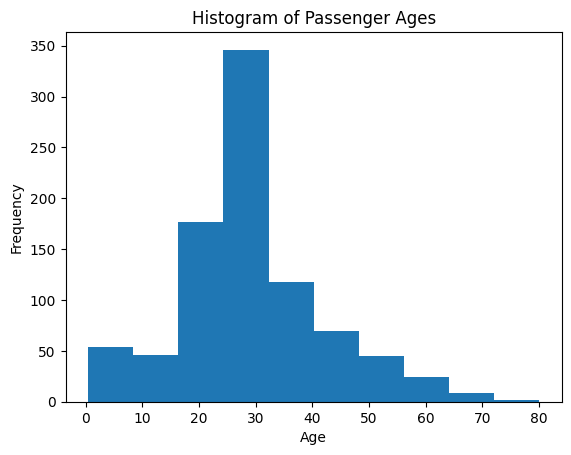

In [ ]:
response = agent.invoke("Show me a histogram of passenger ages")
print(response)

In [9]:
response = agent.run("What was the average ticket fare?")
print(response)



> Entering new AgentExecutor chain...
Thought: To find the average ticket fare, I need to calculate the mean of the 'fare' column in the dataframe.

Action: python_repl_ast
Action Input: df['fare'].mean()32.204207968574636Thought: I now know the final answer
Final Answer: 32.204207968574636

> Finished chain.
32.204207968574636


In [10]:
response = agent.run("How many passengers embarked from each port?")
print(response)



> Entering new AgentExecutor chain...
Thought: To find the number of passengers who embarked from each port, I need to use the 'embarked' column in the dataframe and count the number of occurrences of each port.

Action: python_repl_ast
Action Input: 
```python
import pandas as pd
print(df['embarked'].value_counts())
```embarked
S    646
C    168
Q     77
Name: count, dtype: int64
Thought: I now know the final answer
Final Answer: There were 646 passengers who embarked from port S, 168 from port C, and 77 from port Q.

> Finished chain.
There were 646 passengers who embarked from port S, 168 from port C, and 77 from port Q.


In [177]:
res = agent.run("What was the average ticket fare?")
print(res)



> Entering new AgentExecutor chain...
Thought: To find the average ticket fare, I need to calculate the mean of the 'fare' column.
Action: python_repl_ast
Action Input: df['fare'].mean()32.204207968574636Final Answer: The average ticket fare was approximately $32.20.

> Finished chain.
The average ticket fare was approximately $32.20.
